# Website Landing Page Project - AB Testing

### Objective
- Do the users spend more time on the new landing page than the old landing page?
- Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
- Does the converted status depend on the preferred language? (Contingency table)
- Is the mean time spent on the new page same for the different language users?

*Significance level ($\alpha$) = 0.05 for all tests.*

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("abtest.csv")

In [7]:
#converting data types (object to category)
data['group'] = data['group'].astype('category')
data['landing_page'] = data['landing_page'].astype('category')
data['converted'] = data['converted'].astype('category')
data['language_preferred'] = data['language_preferred'].astype('category')

### Univariate Analysis

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", 
                       order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, 
                    xytext=(0, 5), textcoords="offset points")  # annotate the percentage
        plt.xticks(rotation = 60) #rotates the x-axis labels by 60 degrees

        
    plt.show()  # show the plot

- labeled_barplot is used for categorical data: group, landing_page, converted, language_preferred

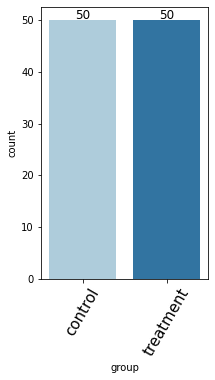

In [15]:
labeled_barplot(data, 'group')

<b>Observations: </b>
- Users are perfectly split 50/50 between the control group and the treatment group.

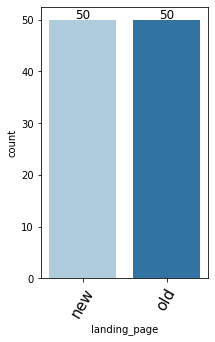

In [16]:
labeled_barplot(data, 'landing_page')

<b>Observations: </b>
- Users are also perfectly split 50/50 between using the new landing page and the old landing page. 

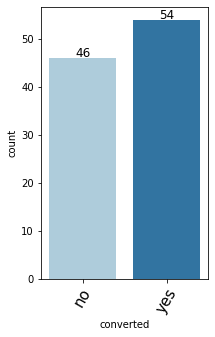

In [17]:
labeled_barplot(data, 'converted')

<b>Observations: </b>
- The majority of users were successfully converted to becoming a subscriber. 
- 54% (54 users of the 100 total) were converted while 46% were not converted. 

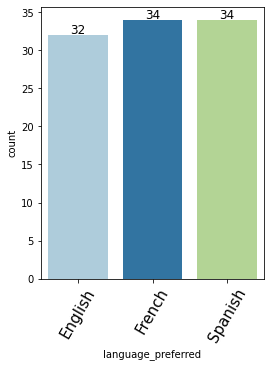

In [18]:
labeled_barplot(data, 'language_preferred')

<b>Observations: </b>
- French and Spanish were preferred over English. 
- Out of the 100 users, 68 users preferred French and Spanish, with 34 users each. 
- The remaining 32 users preferred English. 

### Bivariate Analysis

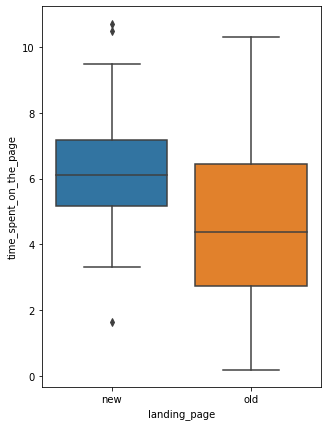

In [19]:
#landing page vs time spent

plt.figure(figsize=(5,7))
sns.boxplot(x ='landing_page', y='time_spent_on_the_page', data=data)
plt.xticks(rotation=0)
plt.show()

<b>Observations: </b>
- On average, users spend more time on the new landing page compared to the old landing page.
- The average time spent on the new landing page sits around 6 minutes while the average time spent on the old landing page is around 4-5 minutes. 
- The interquartile range for users on the old landing page is wider than those using the new landing page. 
- There are a few outliers within the users of the new landing page that fall outside. These fall at approximately ~1.8 minutes and just over 10 minutes. 
- It appears that being on the new or old landing pages influences that overall time spent on the page by the user. 

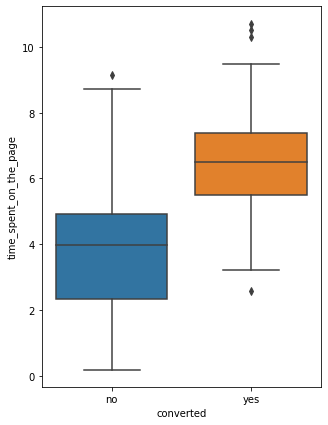

In [20]:
#conversion status vs time spent

plt.figure(figsize=(5,7))
sns.boxplot(x ='converted', y='time_spent_on_the_page', data=data)
plt.xticks(rotation=0)
plt.show()

<b>Observations: </b>
- On average, people that are successfully converted spend more time on average on the landing page than those who were not converted. 
- The average time spent on the page by those that are not converted is around 4 minutes. 
- The average time spent on the page by those that were successfully converted is just under 7 minutes. 
- There is one outlier within the users that were not converted that sits outside of the interquartile range at approximately 9 minutes. There are also a few outliers within the users that were converted at around 3 minutes and a few that sit above 10 minutes. 
- Overall, it appears that the conversion of the user is influenced by the overall time spent on the page.  

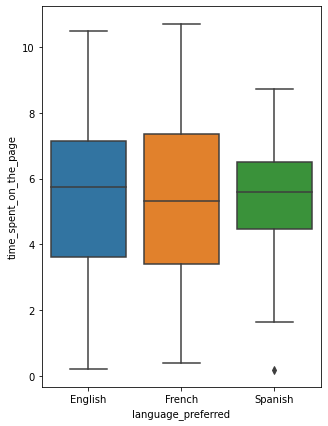

In [21]:
#language vs time spent

plt.figure(figsize=(5,7))
sns.boxplot(x ='language_preferred', y='time_spent_on_the_page', data=data)
plt.xticks(rotation=0)
plt.show()

<b>Observations: </b>
- On average, people that prefer any of the three languages (english, french, and spanish) spend similar amount of time on the webpage (around 5-6 minutes).  
- The interquartile range of time spent for users preferring French is slightly wider than the time spent by users of the other 2 languages. The interquartile range for users preferring Spanish is the smallest compared to the other 2 languages.
- The average time spent on the page by users that prefer French is the lowest on average at approximately 5.5 minutes. 
- The average time spent on the page by users that prefer English is the highest on average at approximately 5.75 minutes. 
- The average time spent on the page by users that prefer Spanish falls in between the averages for users preferring the other 2 langauages, approximately 5.6 minutes. 
- There is one outlier within the users that preferred Spanish that sits outside of the interquartile range that falls at approximately 0 minutes.
- Overall, it appears that language preferrence does not have much of an effect on average time spent on the webpage by users. However, spanish-preferring users have a smaller range of time spent overall but fall around the same overall average as English and French users. 

# Do the users spend more time on the new landing page than the existing landing page?

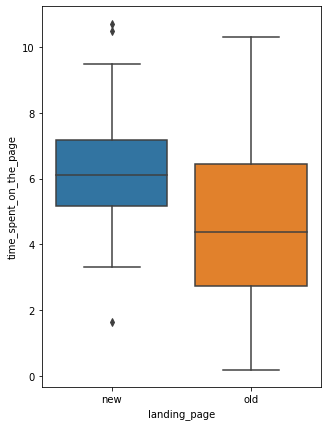

In [22]:
#landing page vs time spent
plt.figure(figsize=(5,7))
sns.boxplot(x ='landing_page', y='time_spent_on_the_page', data=data)
plt.xticks(rotation=0)
plt.show()

### Step 1: Define the null and alternate hypotheses

- $H_0$: $\mu_1 = \mu_2$ (Mean time spent on the new landing page is equal to the mean time spent on the old landing page). 
- $H_a$: $\mu_1 > \mu_2$ (Mean time spent on the new landing page is greater than the mean time spent on the old landing page).



### Step 2: Select Appropriate test

This is a 2-sample problem where the 2 populations (new page and old page users) are assumed independent. Further, this is a one-tailed hypothesis problem concerning population means $\mu_1$ (new landing page users) and $\mu_2$ (old landing page users). The population standard deviations are unknown. 

Because of this information, we will use a <b>2 Independent Sample T-Test</b> using a t-distribution as the test statistic distribution. 

Assumptions that must be met for a 2 Independent Sample T-Test: 
- $\checkmark$ populations are independent.
- $\checkmark$ each group must be obtained via a random sample from the population.
- $\checkmark$ each group is normally distributed with an n>30. *will be confirmed below
- $\checkmark$ data is continuous.
- The variances (standard deviations) for the two independent groups are unequal. *will be tested below

### Step 3: Decide the significance level

Level of significance ($\alpha$) = 0.05 according to problem statement. 

### Step 4: Collect and prepare data

In [23]:
#creating new dataframes containing only old/new page users and time spent
#new users vs time spent
new_time_spent = data[data['landing_page'] == 'new']["time_spent_on_the_page"]

#old users vs time spent
old_time_spent = data[data['landing_page'] == 'old']["time_spent_on_the_page"]

To test if the 2 groups (users of the new landing page and users of the old landing page) are each normally distributed, we use a Shapiro-wilk's test for normality and a significance level of 0.05. 

Users of the new landing page:
- $H_0$: new_time_spent follows a normal distribution
- $H_a$: new_time_spent does not follow a normal distribution

Users of the old landing page:
- $H_0$: old_time_spent follows a normal distribution
- $H_a$: old_time_spent does not follow a normal distribution

(array([ 1.,  1.,  4.,  9., 10., 10.,  7.,  4.,  2.,  2.]),
 array([ 1.65 ,  2.556,  3.462,  4.368,  5.274,  6.18 ,  7.086,  7.992,
         8.898,  9.804, 10.71 ]),
 <BarContainer object of 10 artists>)

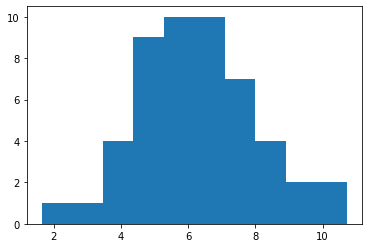

In [24]:
#confirming the assumption that the two groups are normally distributed - visualizing the data:
plt.hist(new_time_spent)

In [25]:
from scipy import stats

w, p_value = stats.shapiro(new_time_spent)
print("p-value = ", p_value)

p-value =  0.8040016293525696


(array([6., 4., 8., 5., 7., 7., 5., 2., 5., 1.]),
 array([ 0.19 ,  1.201,  2.212,  3.223,  4.234,  5.245,  6.256,  7.267,
         8.278,  9.289, 10.3  ]),
 <BarContainer object of 10 artists>)

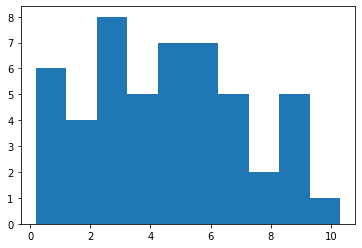

In [26]:
plt.hist(old_time_spent)

In [27]:
from scipy import stats

w, p_value = stats.shapiro(old_time_spent)
print("p-value = ", p_value)

p-value =  0.45611920952796936


<b>Insight:</b> Because both p-values are very large (0.80 and 0.45), we fail to reject the null hypotheses of normality in both instances. We can conclude that both groups follow a normal distribution. 

This satisfies the 3rd required assumption from the list. 

Confirming the assumption that the variances of the two groups are unequal by simply calculating the standard deviations of the overall time spent for users of the new landing page vs the old landing page: 

In [28]:
print("Sample standard deviation of the time spent on the new landing page is:", round(new_time_spent.std(),2))
print("Sample standard deviation of the time spent on the old landing page is:", round(old_time_spent.std(),2))

Sample standard deviation of the time spent on the new landing page is: 1.82
Sample standard deviation of the time spent on the old landing page is: 2.58


<b>Insight:</b> The standard deviations (variances) of the time spent on the new vs old landing page are 1.82 and 2.58 which not equal to each other. This satisfies the 5th assumption on the list that the variances are unequal. 

### Step 5: Calculate the p-value

In [52]:
#finding p-value using ttest_ind

#importing function
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(new_time_spent, old_time_spent,  equal_var = False, alternative = 'greater')
print("p-value =", p_value)

p-value = 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

Because the p-value (0.0001) is less than our $\alpha$ of 0.05, we can reject the null hypothesis of $\mu_1 = \mu_2$.

### Step 7:  Draw inference

We have statistically significant evidence to conclude that the two groups means are not equal. Therefore, because this is a 1-sided test, we can support the claim that the mean time spent on the new landing page is significantly greater than the mean time spent on the old landing page. 

Therefore, we can infer that users are more likely to spend more time on the website if presented with the new landing page than they would if they were presented with the old page. 

# Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

<AxesSubplot:xlabel='landing_page', ylabel='count'>

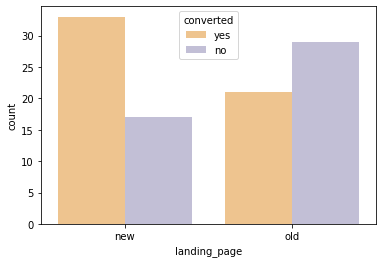

In [30]:
# figure of conversion rate for new vs conversion rate for old
sns.countplot(data = data, x = 'landing_page', hue = 'converted', hue_order = ['yes', 'no'], palette = "PuOr")

### Step 1: Null and Alternative Hypotheses

- $H_0$: $p_1 = p_2$ (Proportion of users that are converted on the new landing page is equal to the proportion of users that are converted on the old landing page). 
- $H_a$: $p_1 > p_2$ (Proportion of users that are converted on the new landing page is greater than the proportion of users that are converted on the old landing page).

### Step 2: Select Test

This is a one-tailed test concerning 2 population proportions $p_1$ (users converted while using the new landing page) and $p_2$ (users converted while using the old landing page). The two populations are assumed to be independent. The population standard deviations are unknown. 

Because of this information, we will use a <b> 2-proportion z-test</b> with a standard normal distribution. 

Assumptions that must be met for a 2 Proportion Z-Test: 
- $\checkmark$ binomally distributed populations (both variables are split into 2 categories - old vs new and yes vs no). 
- $\checkmark$ samples come from 2 independent populations
- $\checkmark$ random sampling from populations
- $\checkmark$ the binomial distribution can be approximated to normal distribution *will be confirmed below 

Checking whether the binomial distribution of the variables can be approximately to the normal distribution: 

- N = sample size  
- p = sample proportion

If np and n(1-p) are greater than or equal to 10 for both variables, we can conclude that it can be approximated to the normal distribution. 

$ np_1 = 50\cdot \frac{33}{50} = 33 \geq 10 \\
n(1-p_1) = 50 \cdot \frac{50-33}{50} = 17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 400 \cdot \frac{50-21}{50} =28.999 \geq 10 $

All 4 values are greater than 10. This satisfies the last assumption of the list and shows that the distribution of our variables can be approximated to the normal distribution by the central limit theorem. 

### Step 3: Significance Level 

Level of significance ($\alpha$) = 0.05 according to problem statement. 

### Step 4: Collect and Prepare Data

In [31]:
#creating new dataframes containing only old/new page users and converted (yes/no)
#new page vs conversion status
converted_new = data[data['landing_page'] == 'new']["converted"]

#old page vs conversion status
converted_old = data[data['landing_page'] == 'old']["converted"]

In [32]:
converted_new.value_counts()

yes    33
no     17
Name: converted, dtype: int64

In [33]:
converted_old.value_counts()[["yes","no"]] #fixes the order of the output to match the order of the output above

yes    21
no     29
Name: converted, dtype: int64

<b>Insights: </b> Of the 50 total users of the new landing page, 33 were successfully converted into subscribers while 17 were not. Of the 50 users of the old landing page, only 21 users were successfully converted while 29 of them were not. 

### Step 5: P-value

In [55]:
#calculating p-value using proportions_ztest function:

#importing function
from statsmodels.stats.proportion import proportions_ztest

#successfully converted values within groups
#np.array([#converted from new page, #converted from old page])
successfully_converted = np.array([33, 21])

#sample sizes from groups
#np.array([n of new page group, n of old page group])
nobs = np.array([50,50])

#calculating p-value:
test_stat, p_value = proportions_ztest(successfully_converted, nobs)
print("p-value = ", p_value)

p-value =  0.016052616408112556


### Step 6: Compare p-value with $\alpha$

Because the p-value (0.016) is less than our $\alpha$ of 0.05, we can reject the null hypothesis of $p_1 = p_2$.

### Step 7: Draw Inference

We have statistically significant evidence to conclude that the two group proportions are not equal. Therefore, because this is a 1-sided test, we can support the claim that the proportion of users that were converted on the new landing page is greater than the proportion of users that were converted on the old landing page. 

Because of this, we can infer that users are more likely to be converted when presented with the new landing page than they previously would have been if presented with the old page. 

## Is the conversion and preferred language are independent or related?

<AxesSubplot:xlabel='language_preferred', ylabel='count'>

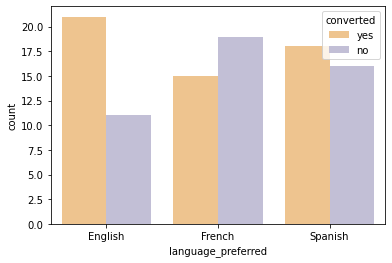

In [35]:
#conversion status vs perferred language
sns.countplot(data = data, x = 'language_preferred', hue = 'converted', 
              hue_order = ['yes', 'no'], palette = "PuOr")

### Step 1: Null and Alternative Hypothesis

- $H_0:$ variables are independent - conversion rate is independent of language preference
- $H_a:$ variables are not indepedent - conversion rate depends on language preference

### Step 2: Select Test

This is a test of independence with 2 categorical variables - conversion status and language preferrence. 

Because of this information, we will use a <b> Chi-Square Test of Independence</b> with a Chi square distribution. 

Assumptions that must be met for a 2 Sample Z-Test: 
- $\checkmark$ variables are categorical
- $\checkmark$ expected value of the number of sample observations in each level of the variable is at least 5
- $\checkmark$ random sampling from the population

### Step 3: Significance Level

Level of significance ($\alpha$) = 0.05 according to problem statement. 

### Step 4: Collect and Prepare Data


In [36]:
#creating new dataframes containing only language preference and converted (yes/no)
#convered (yes) vs language preference
converted_yes = data[data['converted'] == 'yes']["language_preferred"]

#convered (no) vs language preference
converted_no = data[data['converted'] == 'no']["language_preferred"]

In [37]:
converted_yes.value_counts()[["English", "French", "Spanish"]]

English    21
French     15
Spanish    18
Name: language_preferred, dtype: int64

In [38]:
converted_no.value_counts()[["English", "French", "Spanish"]]

English    11
French     19
Spanish    16
Name: language_preferred, dtype: int64

In [39]:
#row 1: yes converted: Eng, French, Span
#row 2: no converted: Eng, French, Span
obs = np.array([[21, 15, 18], [11, 19, 16]])
print(obs)

[[21 15 18]
 [11 19 16]]


In [56]:
#how to make a contingency table:
contingency_table = pd.crosstab(data['converted'], data['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: P-value


In [40]:
#calculating p-value using chi2_contingency function:

#importing function
from scipy.stats import chi2_contingency

#calculating the p-value
#obs = matrix containing observations
chi2, p_value, dof, expected = chi2_contingency(obs)
print("p-value = ", p_value)

p-value =  0.21298887487543447


### Step 6: Compare p-value with $\alpha$


Because the p-value (0.213) is greater than our $\alpha$ of 0.05, we fail to reject the null hypothesis of independence. 

### Step 7: Draw Inference

We do not have statistically significant evidence to conclude that the variables are independent. Therefore, we cannot support the claim that language preferrence and conversion status are independent of each other. 

Because of this, we can infer that language preferrence by users does not influence whether or not the user is likely to be converted to a subscriber. 

# Is the time spent on the new page same for the different language users?

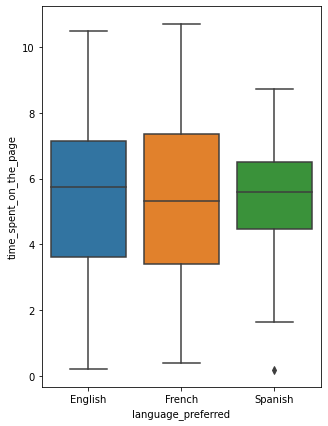

In [41]:
#time spent vs language preferences
plt.figure(figsize=(5,7))
sns.boxplot(x ='language_preferred', y='time_spent_on_the_page', data=data)
plt.xticks(rotation=0)
plt.show()

In [42]:
#means by language:
print("Mean - English:", data[data['language_preferred'] == 'English']["time_spent_on_the_page"].mean())
print("Mean - French:", data[data['language_preferred'] == 'French']["time_spent_on_the_page"].mean())
print("Mean - Spanish:", data[data['language_preferred'] == 'Spanish']["time_spent_on_the_page"].mean())

Mean - English: 5.559062500000001
Mean - French: 5.253235294117649
Mean - Spanish: 5.331764705882351


### Step 1: Null and Alternative Hypothesis

- $H_0: \mu_1 = \mu_2 = \mu_3$ (mean time spent on the page by English users is equal to the mean time spent by French users which is also equal to the mean time spent by Spanish users).
- $H_a:$ at least one of these means is not the same. 

### Step 2: Select Test

This is a test to compare if 3 sample means are significantly different from each other - mean time spent on the page for English, French, and Spanish users. 

Because of this information, we will use a <b> One-way ANOVA test</b> which utilizes a F test statistic distribution. 

Assumptions that must be met for a one-way ANOVA: 
- $\checkmark$ samples are independent random samples
- samples are normally distributed populations *will be tested below using a Shapiro-Wilk's Test
- population variances are equal *will be tested below using a Levene's Test

#### Shapiro Wilks Test applied to the response variable (time spent on page)

Null and Alternative Hypotheses: 
- $H_0:$ time spent on the page follows a normal distribution. 
- $H_a:$ time spent on the page does not follow a normal distribution. 

(array([ 6.,  6.,  8., 12., 19., 16., 17.,  8.,  5.,  3.]),
 array([ 0.19 ,  1.242,  2.294,  3.346,  4.398,  5.45 ,  6.502,  7.554,
         8.606,  9.658, 10.71 ]),
 <BarContainer object of 10 artists>)

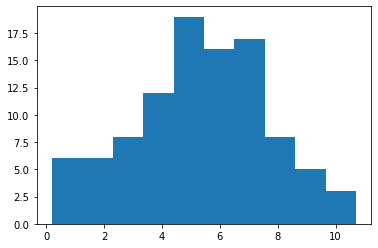

In [43]:
plt.hist(data['time_spent_on_the_page'])

In [44]:
#calculating the p-value
w, p_value = stats.shapiro(data['time_spent_on_the_page'])
print("p-value = ", p_value)

p-value =  0.5643684267997742


<b>Insights:</b> Because the p-value is very large (0.56) compared to alpha (0.05), we fail to reject the null that the response follows a normal distribution. 

Therefore, the data satisfies the required assumption that the time_spent_on_the_page variable is normally distributed. 

#### Levene's Test applied to the response variable with factor (time spent by language preference)

Null and Alternative Hypotheses: 
- $H_0:$ all of the population variances between languages are equal (variances exhibit homogeneity)
- $H_a:$ at least one variance is different from the rest

In [45]:
#importing function
from scipy.stats import levene

#calculating the p-value
statistic, p_value = levene (data['time_spent_on_the_page'][data['language_preferred']=="English"],
                             data['time_spent_on_the_page'][data['language_preferred']=="French"], 
                             data['time_spent_on_the_page'][data['language_preferred']=="Spanish"])

print("p-value = ", p_value)

p-value =  0.06515086840327314


<b>Insights:</b> Because the p-value is large (0.065) compared to alpha (0.05), we fail to reject the null of homogeneity of variances. 

Therefore, the data satisfies the required assumption that the variances of time_spent_on_the_page by languages are equal. 

### Step 3: Significance Level

Level of significance ($\alpha$) = 0.05 according to problem statement. 

### Step 4: Collect and Prepare Data

In [46]:
#creating new dataframes containing only language preference and time spent on page
#english users and time
english_time = data[data['language_preferred'] == 'English']["time_spent_on_the_page"]

#spanish users and time
spanish_time = data[data['language_preferred'] == 'Spanish']["time_spent_on_the_page"]

#french users and time
french_time = data[data['language_preferred'] == 'French']["time_spent_on_the_page"]

### Step 5: P-value

In [60]:
#calculating p-value using f_oneway function:

#importing function
from scipy.stats import f_oneway

#calculating p-value
test_stat, p_value = f_oneway(english_time, spanish_time, french_time)
print("p-value = ", p_value)

p-value =  0.8665610536012648


### Step 6: Compare p-value with $\alpha$

Because the p-value (0.867) is greater than our $\alpha$ of 0.05, we fail to reject the null hypothesis of equal means.

### Step 7: Draw Inference

We can conclude that the mean time spent on the page by English users is not significantly different than the mean time spent by French users which is also not significantly different than the mean time spent by Spanish users. 

Because of this, we can infer that language preference does not play a significant role in the overall time spent by the user on the page. 

### Tukey HSD
It is not neccessary to run a Tukey HSD test for pairwise comparisons. This test will be run anyways to double check our findings that the means of each group are equal. 

For the Tukey HSD test, we will be comparing the means of time spent for:
- English vs French users
- English vs Spanish users
- and French vs Spanish users


The null and alternative hypotheses:
- $H_0: \mu_1 = \mu_2$ and $\mu_1 = \mu_3$ and $\mu_2 = \mu_3$
- $H_0: \mu_1 \neq \mu_2$ or $\mu_1 \neq \mu_3$ or $\mu_2 \neq \mu_3$

The Tukey HSD will help if determine which means (if any) are significantly different from each other. 

In [48]:
#calculating multiple p-values using pairwise_tukeyhsd function

#importing function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#calculating p-values
#endog = response variable, groups = languages, alpha = level of significance (predetermined to be 0.05)
mean_comparisons = pairwise_tukeyhsd(endog = data['time_spent_on_the_page'], 
                                     groups = data['language_preferred'], alpha = 0.05)
print(mean_comparisons)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.3058 0.8482 -1.7123 1.1006  False
English Spanish  -0.2273    0.9 -1.6338 1.1792  False
 French Spanish   0.0785    0.9 -1.3065 1.4635  False
-----------------------------------------------------


<b>Insights:</b>
The fourth column lists the p-value of each pair. The calculate p-values for each pair are:
- English vs French means: p-value = 0.8482
- English vs Spanish means: p-value = 0.9
- English vs Spanish means: p-value = 0.9

All 3 of these p-values are greater than 0.05 ($\alpha$). We fail to reject the null hypothesis of equal means for all 3 pairwise comparisons. Therefore, none of the groups from each pair is significantly different than any other group. This supports our original finding that the mean time spent on the page by users of different languages does not significantly differ depending on the language preferrence. 

# Key Insights & Results

- Users are seen to spend significantly more time on the page overall if they are presented with the new landing page compare to users that are presented with the old landing page. 
- Users are also significantly more likely to be converted when presented with the new landing page than they previously would have been if presented with the old page. 
- In order to maximize the amount of time users spend on the webpage and their likelihood of ultimately becoming subscribers, the portal should switch to using the new landing page full time and stop using the old landing page. 
- When not taking the new vs old langing page into account, language preferrence by the users does not influence whether or not the user is likely to be converted to a subscriber. There is no significant difference between the conversion rate of users by language. 
- Language preferrence has no significant influence on the  amount of time the user ends up spending on the landing page overall. There is no significant relationship between the mean time on the page spent by users by language. 
- Therefore, the online portal does not need to worry about making any changes that are unique to users of specific languages in order to increase the likelihood of that user subscribing or the over time the user may spend on the page.  
- Overall, I recommend that the online news portal switches to using the new landing page full time for all users (for every language). When presented with the new landing page, users of every language preference are more likely to spend an increased amount of time on the page and have a higher likelihood of subscribing to the website than they would be if those that were presented with the old landing page. 